In [1]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline
%load_ext autoreload 

#### Handwritten Digit classification using the entire MNIST Dataset from http://yann.lecun.com/exdb/mnist/  
* The training and the test set consist of 60,000 and 10,000 samples respectively. Each sample is a 28x28 pixel image.  

* The data in the files were parsed using [**python-mnist**](https://github.com/sorki/python-mnist)  
* Normalization (i.e dividing pixel intensity by 255) was the only preprocessing attempted on the data   
* The classification was implemented using a 3 layer neural network with 784 input units, 30 units in the first hidden layer, 20 in the second hidden layer, 10 units representing the ten digits in the output layer.  
* Classification accuracy obtained on the test set: **97.76 %**



In [2]:
# Default figure size
plt.rcParams['figure.figsize'] = (10,7)
%autoreload 2
from utilities import *

In [3]:
# Sanity Check for parameter initialization
params = params_init([2,3,3])
print("W1 =\n %s" %(params['W1']))
print("b1 =\n %s" %(params['b1']))
print("W2 =\n %s" %(params['W2']))
print("b2 =\n %s" %(params['b2']))

W1 =
 [[-0.8095748  -1.03370982]
 [ 0.32002589  0.4240655 ]
 [ 0.19775268 -1.52462043]]
b1 =
 [[0.]
 [0.]
 [0.]]
W2 =
 [[-0.44891189 -0.25752619  0.85517145]
 [ 0.39208582  0.71961188 -0.37249314]
 [ 0.96378027 -0.1672036  -1.2240053 ]]
b2 =
 [[0.]
 [0.]
 [0.]]


In [4]:
# Forward Prop sanity check
X = np.array([[5,7,10],[2,3,5]])
print ("Temp Data (X):\n",X)
output,caches = forward_prop(X,params)
print("\nOutput from forward_prop:\n",output)
# Sum along the columns should be  = 1 for softmax 
print ("\nSum along the columns:",np.sum(output,axis=0))

Temp Data (X):
 [[ 5  7 10]
 [ 2  3  5]]

Output from forward_prop:
 [[0.07583808 0.03001722 0.0054437 ]
 [0.8295547  0.92875888 0.98575387]
 [0.09460722 0.0412239  0.00880243]]

Sum along the columns: [1. 1. 1.]


In [5]:
# Cost sanity check
Y = np.eye(3,3)
print ("Temp Labels (Y):\n", Y)
cost = costFunction(output,Y)
print ("\nCost for temp X and Y:\n",cost)

Temp Labels (Y):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Cost for temp X and Y:
 2.4619292862065625


In [6]:
# Computing and displaying the dict 'grads' which consists of the computed gradients for temp X and y
grads = backprop(output,Y,caches,params,lamb=0)
grads

{'dA1': array([[ 0.83130448, -0.00167694, -0.57124029],
        [ 0.81913466, -0.06588896,  0.8736901 ],
        [-1.21512007,  0.00174842,  0.85069982]]),
 'dW1': array([[0.        , 0.        ],
        [4.12378385, 1.93635097],
        [0.        , 0.        ]]),
 'dW2': array([[ 0.        , -0.70939787,  0.        ],
        [ 0.        ,  2.34184297,  0.        ],
        [ 0.        , -1.6324451 ,  0.        ]]),
 'db1': array([[0.        ],
        [0.54231193],
        [0.        ]]),
 'db2': array([[-0.29623367],
        [ 0.58135582],
        [-0.28512215]])}

In [7]:
#Load training data stored in MNIST Format
mndata = MNIST()
mndata.gz = True
images,labels = mndata.load_training()

In [8]:
# Assinging the samples to 'X' and labels to 'y'
# Reshaping X as (n x m) --> (Features x samples)
X = np.array(images).T
Y = np.array(labels)
class_labels = np.unique(Y)
# Converting to a one hot matrix
Y_hot = one_hot(Y)
print ("Dimensions of X (Features(n) x Examples(m)):",X.shape)
print ("\nDiemsions of Y:",Y_hot.shape)

Dimensions of X (Features(n) x Examples(m)): (784, 60000)

Diemsions of Y: (10, 60000)


In [9]:
# Class Labels
class_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
# Normalizing the data
Xnorm = X/255

In [11]:
# Loading the test data 
testX,testY = mndata.load_testing()

In [12]:
# Assinging the samples to 'testX' and labels to 'testY'
# Reshaping testX as (n x m) --> (Features x samples)
testX = np.array(testX).T
testY = np.array(testY)
testY_hot = one_hot(testY)
print ("Diemsions of testX:",testX.shape)

Diemsions of testX: (784, 10000)


In [13]:
# Normalizing
test_Xnorm = testX/255

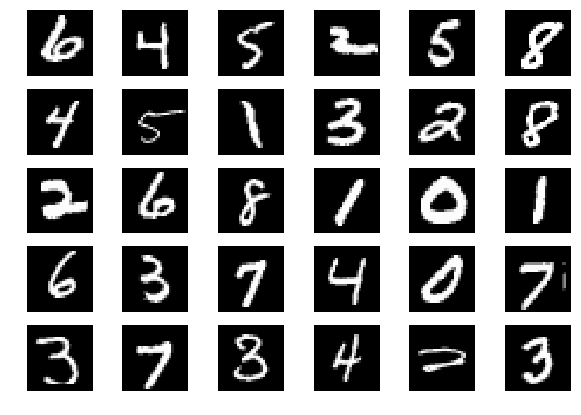

In [14]:
# Plotting 30 random examples from X
indices = np.random.choice(Y.size,30)

fig = plt.figure()
for i in range (30):
    img = X[:,indices[i]].reshape(28,28)
    fig.add_subplot(5,6,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis("off")

plt.show()

In [15]:
# Function to create mini batches
def random_mini_batches(X,Y,batch_size = 64):
    
    mini_batches = []
    m = X.shape[1]
    # Shuffle
    permute = np.random.permutation(m)
    X = X[:,permute]
    Y = Y[:,permute]
    
    # Partition
    complete_batches = math.floor(m/batch_size)
    for k in range(complete_batches):
        batch_X = X[:,k*batch_size:(k+1)*batch_size]
        batch_Y = Y[:,k*batch_size:(k+1)*batch_size]
        batch = (batch_X,batch_Y)
        mini_batches.append(batch)
        
    # Handling the end case
    if m % batch_size != 0:
        batch_X = X[:,(k+1)*batch_size:]
        batch_Y = Y[:,(k+1)*batch_size:]
        batch = (batch_X,batch_Y)
        mini_batches.append(batch)
        
    return mini_batches

In [16]:
# Sanity Check for random_mini_batches
tempX = np.random.rand(5,20)
tempY = np.random.rand(1,20)>0.5
mini_b =random_mini_batches(tempX,tempY,8)
print ("shape of the 1st mini_batch_X: " + str(mini_b[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_b[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_b[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_b[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_b[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_b[2][1].shape))


shape of the 1st mini_batch_X: (5, 8)
shape of the 2nd mini_batch_X: (5, 8)
shape of the 3rd mini_batch_X: (5, 4)
shape of the 1st mini_batch_Y: (1, 8)
shape of the 2nd mini_batch_Y: (1, 8)
shape of the 3rd mini_batch_Y: (1, 4)


In [17]:
# Function to implement a Neural Network
def model(X,Y,layer_dims,alpha=0.01,batch_size=128,num_epochs=1000
          ,lamb=0,print_cost=True,grad_check=False):
    
    params = params_init(layer_dims)
    v,s = init_for_adam(params)
    t = 0
    hist_cost=[]
    
    epoch_choice = np.random.choice(num_epochs,2)
    
    num_batches = np.ceil(X.shape[1]/batch_size)
    
    for i in range(num_epochs):
        epoch_cost = 0 
        minibatches = random_mini_batches(X,Y,batch_size)
        iter_check = 0
        # Using an exponential learning rate decay
        lr = learningRate_decay(alpha,i)
         
        for mini_b in minibatches:
            (mini_x,mini_y) = mini_b
            AL,caches = forward_prop(mini_x,params)
            AL = np.clip(AL,a_min=1e-10,a_max=None)
            reg_term = l2regularization(params,lamb)
            cost = costFunction(AL,mini_y,reg_term)
            epoch_cost += cost 
            grads = backprop(AL,mini_y,caches,params,lamb)
            if grad_check and i in epoch_choice  and iter_check <3:
                gradient_check(mini_x,mini_y,params,grads)
                iter_check +=1
            t += 1
            params,v,s = update_parameters_with_adam(params,grads,v,s,t,lr)
        
        
        hist_cost.append(epoch_cost/num_batches)
        if i%50 == 0 and print_cost:
            print ("Cost after epoch %i: %f" %(i, epoch_cost/num_batches))
            
            
    if grad_check == False:        
        plt.plot(np.squeeze(hist_cost))
        plt.ylabel('Cost')
        plt.xlabel('Epochs')
        plt.title('Starting Learing Rate = '+ str(alpha))
        plt.show()
    
    return params

In [18]:
# Function to find the learning rate suitable for the problem
def lrFinder(X,Y,layer_dims,batch_size=256,num_epochs=3):

    hist_cost = [[] for _ in range(num_epochs)]
    hist_lr = [[] for _ in range(num_epochs)]
    
    for i in range(num_epochs):
        params = params_init(layer_dims)
        v,s = init_for_adam(params)
        t = 0
        lr_list = lrList()
        minibatches = random_mini_batches(X,Y,batch_size)
        for mini_b in minibatches:
            (mini_x,mini_y) = mini_b
            if(t == len(lr_list)):
                break
            lr = lr_list[t]
            AL,caches = forward_prop(mini_x,params)
            AL = np.clip(AL,a_min=1e-10,a_max=None)
            cost = costFunction(AL,mini_y)
            hist_cost[i].append(cost)
            grads = backprop(AL,mini_y,caches,params)
            t += 1
            params,v,s = update_parameters_with_adam(params,grads,v,s,t,lr)
        
    temp = np.array(hist_cost)
    h_cost = np.sum(temp,axis=0)
    
    #print (lr_list)
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    plt.plot(lr_list)
    plt.ylabel("Learning Rate")
    plt.xlabel("Iterations")
    plt.subplot(2,1,2)
    plt.semilogx(lr_list,h_cost)
    plt.xlabel("Learning Rate (log scale)")
    plt.ylabel("Loss")
    plt.ylim(ymax=10)
    

In [19]:
# Implementing a sample neural net for gradient checking
layer_dims = [X.shape[0],10,Y_hot.shape[0]]
params0 = model(Xnorm,Y_hot,layer_dims,grad_check=True,alpha=0.001,num_epochs=200)

Cost after epoch 0: 0.793792
Your backward propagation works perfectly fine! difference = 6.424727892454577e-09
Your backward propagation works perfectly fine! difference = 9.251177199138986e-09
Your backward propagation works perfectly fine! difference = 5.475583966415036e-09
Cost after epoch 50: 0.170614
Your backward propagation works perfectly fine! difference = 7.18372369581287e-09
Your backward propagation works perfectly fine! difference = 6.808938810840788e-09
Your backward propagation works perfectly fine! difference = 6.9113032981749365e-09
Cost after epoch 100: 0.153762
Cost after epoch 150: 0.144999


In [20]:
# 3 layer NN 
# Total number of pixels of each image = 784 fed as input
# 30 units in the first hidden layer , 20 in the second hidden layer
# No. of classes = 10 units in the output layer
layer_dims = [X.shape[0],30,20,Y_hot.shape[0]]

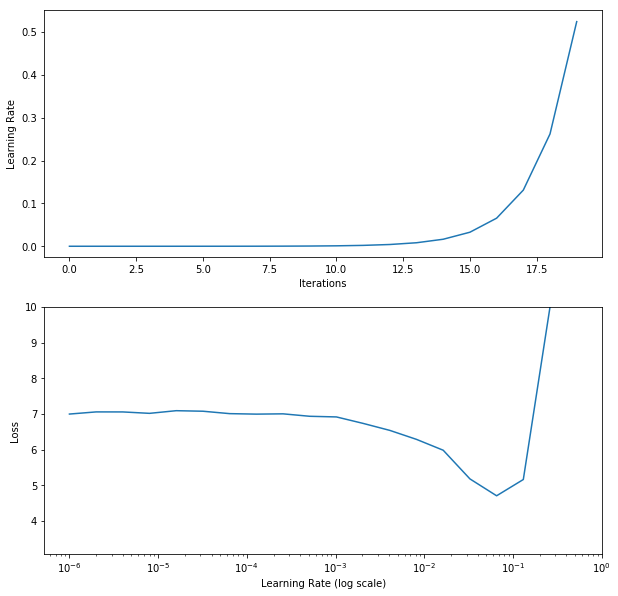

In [21]:
# Implementing lrFinder to find the appropriate learning rate 
lrFinder(Xnorm,Y_hot,layer_dims)

We plot the loss by varying the learning rate exponentially each minibatch to find steepest decrease in loss.  
Since the minimum of the curve is around $10 ^{-1}$  a step behind i.e $10 ^{-2}$  might be a good choice for the learning rate 

Cost after epoch 0: 0.393793
Cost after epoch 50: 0.029654
Cost after epoch 100: 0.013321
Cost after epoch 150: 0.000897
Cost after epoch 200: 0.000373
Cost after epoch 250: 0.000126


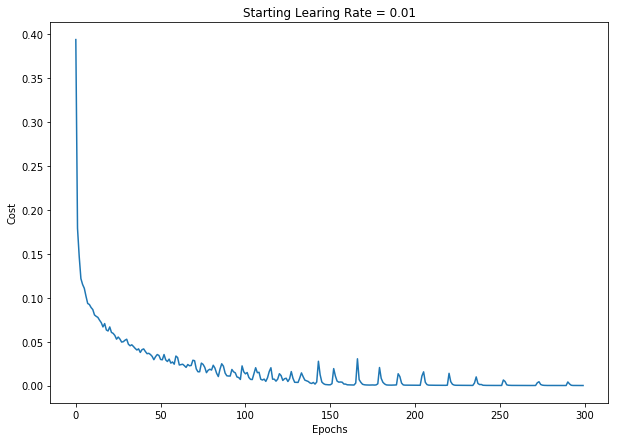

Accuracy on the Training Set: 100.0 %
Accuracy on the Test Set: 95.77 %
Neural Network made errors in predicting 423 samples out of 10000 in the Test Set 


In [29]:
# Implementing a neural network without regularization
# Plotting the Cost vs Epochs to check for convergence
params1 = model(Xnorm,Y_hot,layer_dims,num_epochs=300,
                batch_size=256,alpha=0.01,lamb=0)
# Calculating the accuracy of the model created
accuracy(Xnorm,Y,test_Xnorm,testY,params1)

Cost after epoch 0: 0.401511
Cost after epoch 50: 0.192639
Cost after epoch 100: 0.174206
Cost after epoch 150: 0.156365
Cost after epoch 200: 0.147266
Cost after epoch 250: 0.138435
Cost after epoch 300: 0.131368


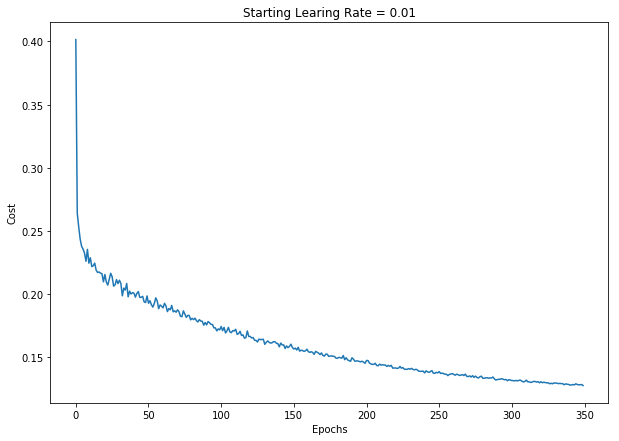

Accuracy on the Training Set: 98.97 %
Accuracy on the Test Set: 97.76 %
Neural Network made errors in predicting 224 samples out of 10000 in the Test Set 


In [30]:
# Implementing a neural network with regularization
# Plotting the Cost vs Epochs to check for convergence
params2 = model(Xnorm,Y_hot,layer_dims,num_epochs=350,
                batch_size=256,alpha=0.01,lamb=0.25)
# Calculating the accuracy of the model created
accuracy(Xnorm,Y,test_Xnorm,testY,params2)

In [31]:
# Saving The Parameters
np.savez('finalParams',params=params2)
Weights = np.load('finalParams.npz')
finalParams = Weights['params'].item()

In [32]:
# Getting the predictions for the test set
pred_y = predict_multiClass(test_Xnorm,finalParams)

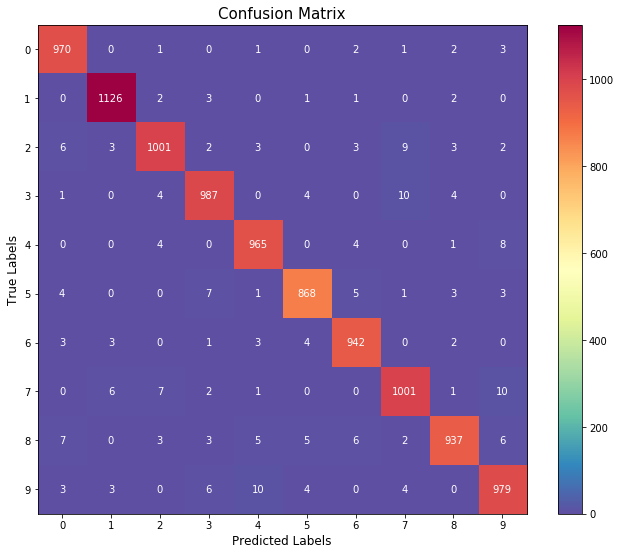

In [33]:
# Computing and plotting the confusion matrix on the test set
c_mat = confusion_matrix(testY,pred_y,class_labels)
plot_confusionMatrix(c_mat,class_labels)

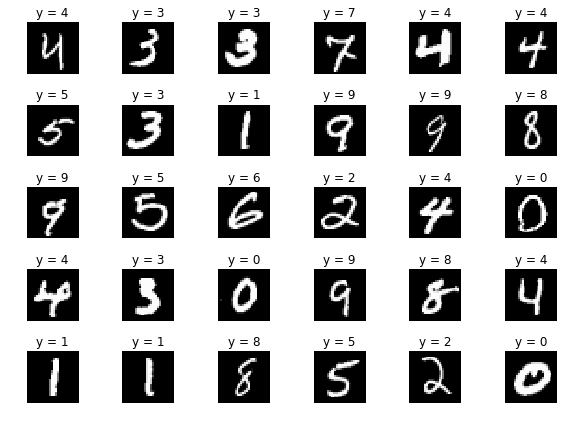

In [35]:
# Plotting 30 random samples from the test set with their predictions
indices = np.random.choice(testY.size,30)

fig = plt.figure()
for i in range (30):
    img = testX[:,indices[i]].reshape(28,28)
    fig.add_subplot(5,6,i+1)
    plt.imshow(img,cmap='gray')
    plt.title('y = '+str(pred_y[indices[i]]))
    plt.axis("off")
    
plt.subplots_adjust(hspace = 0.6)
plt.show()